# Final Project Submission

Please fill out:
* Student name: Joey Husney
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

Using the King County House Sales dataset, we will *predict* the sale price of houses as accurately as possible based on all the values we are given.



# OBTAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

In [2]:
kings_df = pd.read_csv('kc_house_data.csv', index_col='id')
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
kings_df.shape

(21597, 20)

In [4]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [5]:
kings_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

## Things to consider
* May want to convert date column to date datatype
* sqr foot basement should probably be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [6]:
kings_df['date'] = pd.to_datetime(kings_df['date']) 

In [7]:
kings_df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### Question 1: Are there any numerical columns that should should be considered categorical?

In [8]:
# Create scatter matrix to see if any numerical categorical values
#pd.plotting.scatter_matrix(kings_df, figsize=(18,20));

### Check for NULL values

In [9]:
kings_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [10]:
kings_df['waterfront'].head()

id
7129300520    NaN
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
Name: waterfront, dtype: float64

In [11]:
kings_df['waterfront'].value_counts(normalize=True, dropna=False)

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

In [12]:
# Goind to drop this column because it's messy and doesn't add much value to overall goal
kings_df.drop(columns='waterfront', inplace=True)

In [13]:
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
kings_df['view'].value_counts(normalize=True, dropna=False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

#### Most of these houses seem not to have a view. Therefore, we will replace null values with 0

In [15]:
kings_df['view'].fillna(value=0, inplace=True)
kings_df['view'].value_counts(normalize=True, dropna=False)

0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

In [16]:
kings_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

#### Because 78% of these houses were not renovated, we will make this column into a 0 and 1's column based on whether each particular house was renovated or not

In [18]:
def convert_to_bool(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [19]:
kings_df['yr_renovated'] = kings_df['yr_renovated'].map(convert_to_bool)

In [20]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0    0.965551
1    0.034449
Name: yr_renovated, dtype: float64

In [21]:
kings_df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
kings_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007


In [22]:
kings_df['renovated'].value_counts(normalize=True, dropna=False)

0    0.965551
1    0.034449
Name: renovated, dtype: float64

In [23]:
kings_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### We now got rid of all known null values. But we need to check that all the data still makes sense and all the values aren't 'hidden nulls' Going to look at min and max of all numeric columns

In [24]:
kings_df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.23,3.41,7.66,1788.60,1971.00,0.03,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.76,0.65,1.17,827.76,29.38,0.18,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,2015.00,1.00,98199.00,47.78,-121.32,6210.00,871200.00


In [25]:
kings_df['yr_built'].value_counts(normalize=True, dropna=False)

2014    0.025883
2006    0.020975
2005    0.020836
2004    0.020049
2003    0.019447
          ...   
1933    0.001389
1901    0.001343
1902    0.001250
1935    0.001111
1934    0.000972
Name: yr_built, Length: 116, dtype: float64

#### Change sqft_basement from String to Float data type

In [26]:
kings_df['sqft_basement'] = pd.to_numeric(kings_df['sqft_basement'], errors='coerce')

In [27]:
kings_df['sqft_basement']

id
7129300520      0.0
6414100192    400.0
5631500400      0.0
2487200875    910.0
1954400510      0.0
              ...  
263000018       0.0
6600060120      0.0
1523300141      0.0
291310100       0.0
1523300157      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [28]:
kings_df['sqft_basement'].value_counts(normalize=True, dropna=False)


0.0       0.593879
NaN       0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
588.0     0.000046
1920.0    0.000046
2390.0    0.000046
1245.0    0.000046
1135.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

#### Looking at the value counts after converting to float, it seems that we missed some null values for sqft_basement column. Will replace null values with most common value - zero

In [29]:
kings_df['view'].fillna(value=0, inplace=True)
kings_df['view'].value_counts(normalize=True, dropna=False)

0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

#### On second thought, it seems that this should be made into a boolean columns whether or not the houses contain a view for the same reason as sqft_bsmt

In [30]:
kings_df['view'] = kings_df['view'].map(convert_to_bool)
kings_df['view'].value_counts(normalize=True, dropna=False)

0    0.902209
1    0.097791
Name: view, dtype: float64

### Identify outliers

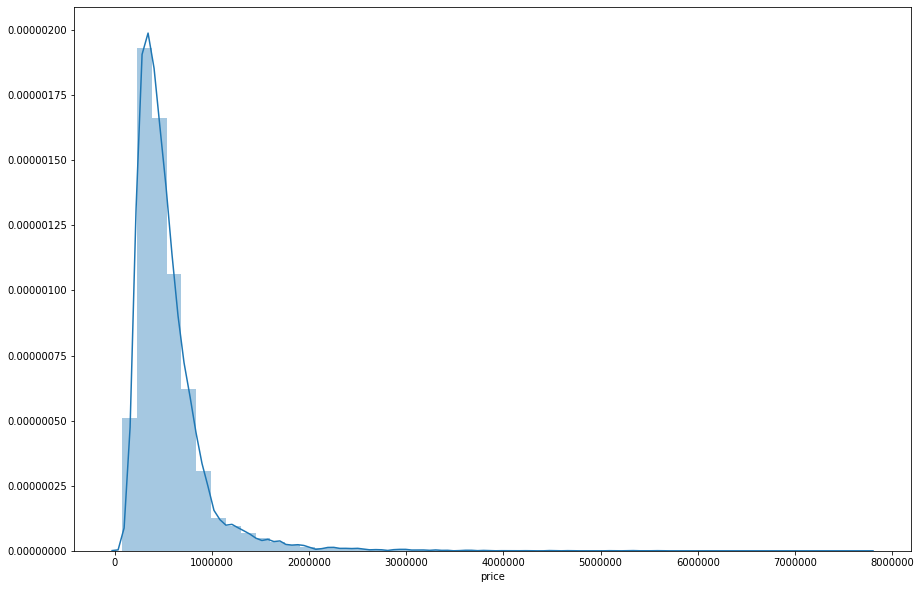

In [33]:
plt.rcParams['figure.figsize'] = (15,10)
target = 'price'
sns.distplot(kings_df[target])

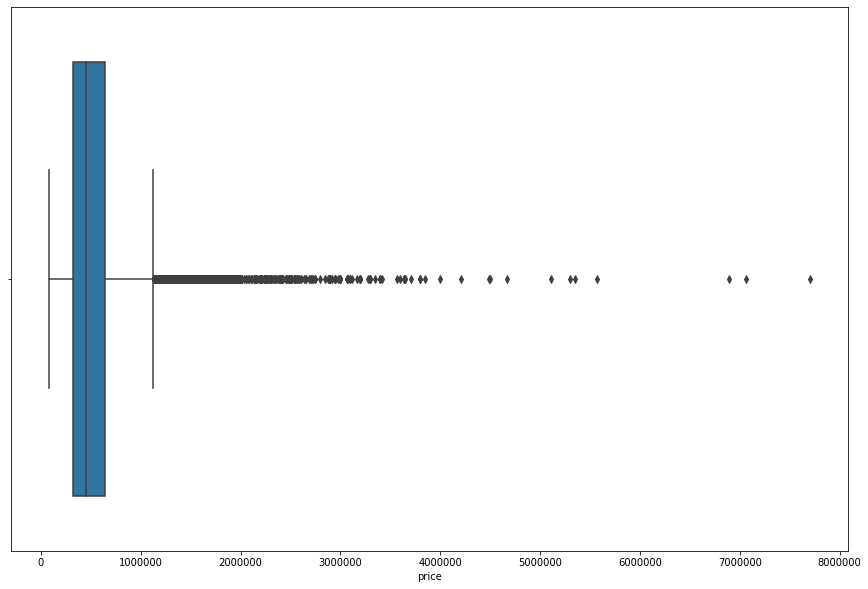

In [32]:
sns.boxplot(kings_df[target])

> We see clearly from both the histogram and the whisker plot that there are many outliers for price column

#### Remove outliers

In [35]:
import scipy
z_price = scipy.stats.zscore(kings_df['price'])
z_price = np.abs(z_price)
z_price

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

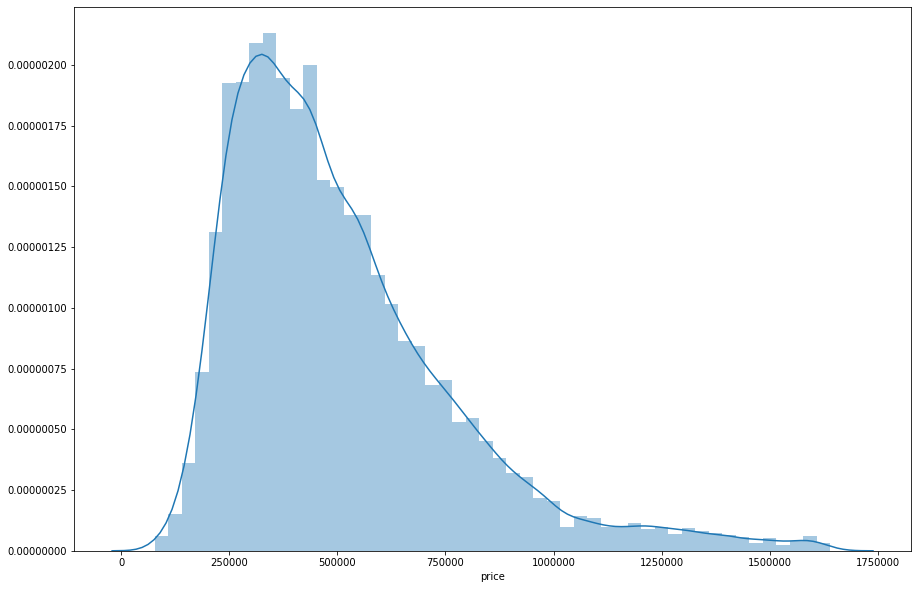

In [36]:
# Preview histogram before changing
sns.distplot(kings_df[z_price < 3]['price'])

In [37]:
# Make changes
kings_df = kings_df[z_price < 3]
kings_df.shape

# Maybe go back and remove more outliers from other cols based on modelling

(21191, 19)

### Check for multicollinearity

In [38]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

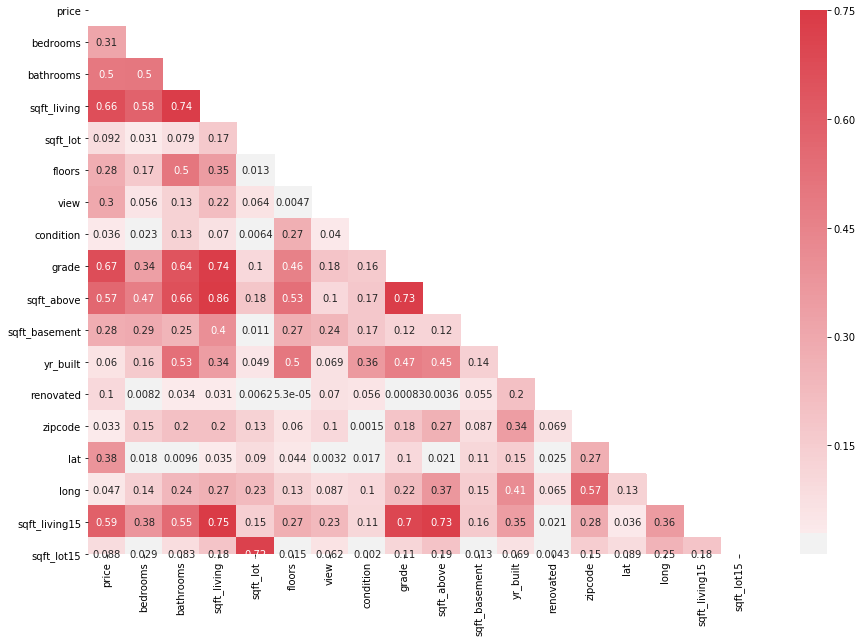

In [39]:
check_multicol(kings_df)

### Multicolinearity found in following combinations:
* sqft_above and sqft_living
* sqft_living and bathrooms
* grade and sqft_living
* sqft_above and sqft_living
* sqft_above and grade
* sqft_living15 and sqft_living
* sqft_living15 and sqft_above
* sqft_living15 and grade
* sqft_lot15 and sqft_lot

#### Remove sqft_above due to high multicollinearity and lack of importance compared to sqft_living

In [41]:
kings_df.drop(['sqft_above'], inplace=True, axis=1)
kings_df.head()

KeyError: "['sqft_above'] not found in axis"

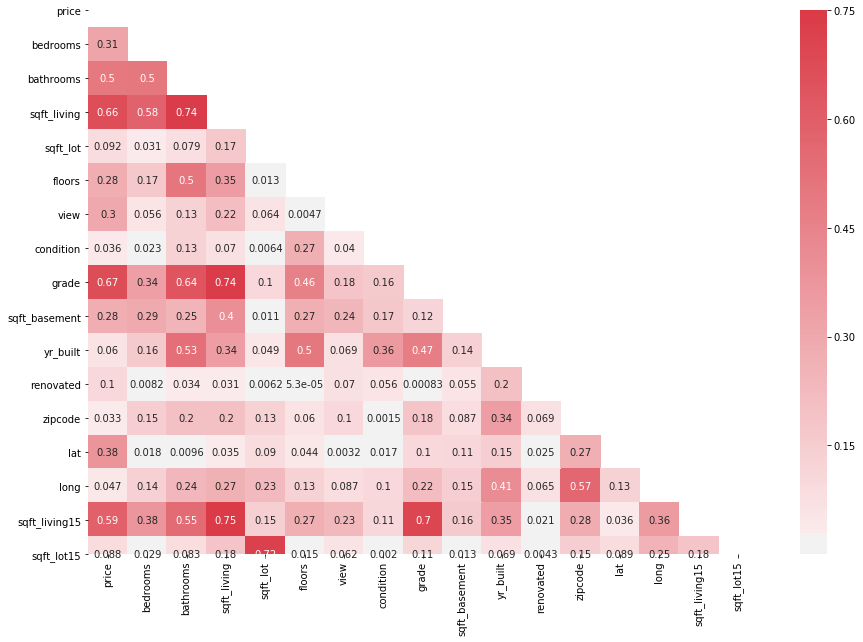

In [42]:
check_multicol(kings_df)

### Normalize data

# EXPLORE

# MODEL

In [43]:
outcome = 'price'
x_cols = list(kings_df.drop(['price', 'date'], axis=1).columns)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [44]:
from statsmodels.formula.api import ols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_basement+yr_built+renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [45]:
model = ols(formula=formula, data=kings_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     3137.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:30:23   Log-Likelihood:            -2.7525e+05
No. Observations:               20742   AIC:                         5.505e+05
Df Residuals:                   20725   BIC:                         5.507e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.622e+06   2.09e+06     -1.736      0.083   -7.71e+06    4.67e+05
bedrooms       -1.49e+04   1370.890    -10.867      0.000   -1.76e+04   -1.22e+04
bathrooms       2.82e+04   2358.070     11.959      0.000    2.36e+04    3.28e+04
sqft_living      91.2317      2.786     32.747      0.000      85.771      96.692
sqft_lot          0.1845      0.035      5.319      0.000       0.116       0.252
floors         3.268e+04   2595.125     12.591      0.000    2.76e+04    3.78e+04
view           1.059e+05   3722.897     28.454      0.000    9.86e+04    1.13e+05
condition       2.82e+04   1670.071     16.884      0.000    2.49e+04    3.15e+04
grade          8.789e+04   1553.745     56.566      0.000    8.48e+04    9.09e+04
sqft_basement    -0.3008      3.200     -0.094      0.925      -6.572       5.971
yr_built      -2147.2739     51.753    -41.491      0.000   -2248.714   -2045.834
renovated      4.573e+04   5786.614      7.903      0.000    3.44e+04    5.71e+04
zipcode        -340.4200     23.526    -14.470      0.000    -386.533    -294.307
lat            5.633e+05   7592.971     74.187      0.000    5.48e+05    5.78e+05
long          -1.133e+05   9356.767    -12.105      0.000   -1.32e+05   -9.49e+04
sqft_living15    49.4172      2.554     19.346      0.000      44.410      54.424
sqft_lot15       -0.1418      0.052     -2.704      0.007      -0.245      -0.039
==============================================================================
Omnibus:                     4730.173   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17813.046
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       6.966   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# qq plot
# scatter plot bet price and residuals (model.resid)

# INTERPRET

### sqft_basement seems to have no impact on sale price due to high p-value

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.